<a href="https://colab.research.google.com/github/Lplus0/DeepLearningLink/blob/main/Pytorch_MSE_7858.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install pandas_datareader
!pip install torch

In [ ]:
!pip list | grep numpy

numpy                            1.25.2


In [ ]:
import torch
import numpy as np
import pandas as pd
import pylab as plt
from pandas_datareader import data
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

In [ ]:
yf.pdr_override()

mtr = data.get_data_yahoo('0066.HK',start="2010-01-01",
                          end="2020-06-30").reset_index()
mtr = mtr[['Close']]

mtr1 = data.get_data_yahoo('0066.HK',start="2021-01-01",
                          end="2021-04-30").reset_index()
mtr1 = mtr1[['Close']]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
mtr.values
mtr1.shape

(79, 1)

In [ ]:
scaler = MinMaxScaler()
mtr_scaled = scaler.fit_transform(mtr.values)

In [ ]:
scaler = MinMaxScaler()
mtr1_scaled = scaler.fit_transform(mtr1.values)

In [ ]:
mtr_scaled[0:12],mtr1_scaled[0:12]

(array([[0.12158054],
        [0.11094229],
        [0.1094225 ],
        [0.1094225 ],
        [0.11398176],
        [0.12158054],
        [0.12158054],
        [0.1094225 ],
        [0.11398176],
        [0.11854107],
        [0.13525838],
        [0.12765959]]),
 array([[0.14912319],
        [0.3157893 ],
        [0.28947391],
        [0.27192965],
        [0.22807001],
        [0.12280713],
        [0.22807001],
        [0.29824571],
        [0.3684214 ],
        [0.25438606],
        [0.22807001],
        [0.34210535]]))

In [ ]:

d = np.array(d)
x =  d[:10, :-1,:]
x

d1 = np.array(d1)
x1 = d1[:10, :-1,:]
x1.shape
# x: array([], shape=(10, 6, 0), dtype=float64)


(10, 0, 7)

In [ ]:
d = []
for i in range(len(mtr_scaled)-8):
    d.append(mtr_scaled[i: i + 8])
d = np.array(d)
d = np.array([x[i].T for i in range(10)])
# only show top10
d
d1 = []
for i in range(len(mtr1_scaled)-8):
    d1.append(mtr1_scaled[i: i + 8])
d1 = np.array(d1)
d1 = np.array([x1[i].T for i in range(10)])
# only show top10
d1



array([], shape=(10, 7, 0), dtype=float64)

In [ ]:
y =  d[:10, -1, :]
y
y1 = d1[:10, -1, :]
y1
# not use
# y: array([], shape=(10, 0), dtype=float64)

array([], shape=(10, 0), dtype=float64)

In [ ]:
lookback = 8
def split_data(stock, lookback):
    data_raw = stock
    data = []
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data)

    test_set_size = int(np.round(0.2*stock.shape[0]))
    train_set_size = stock.shape[0] - test_set_size

    x_train = data[:train_set_size, :-1,:]
    x_train = np.array([x_train[i].T for i in range(len(x_train))])

    y_train = data[:train_set_size, -1, :]
    y_train = np.array([y_train[i].T for i in range(len(y_train))])

    x_test = data[train_set_size:, :-1, :]
    x_test = np.array([x_test[i].T for i in range(len(x_test))])

    y_test = data[train_set_size:, -1, :]
    y_test = np.array([y_test[i].T for i in range(len(y_test))])

    return (x_train, y_train, x_test, y_test)

In [ ]:
x_train, y_train, x_test, y_test = split_data(mtr_scaled, lookback)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2070, 1, 7), (2070, 1), (509, 1, 7), (509, 1))

In [ ]:
lookback = 8
def split_val_data(stock, lookback):
    data_raw = stock
    data = []
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data)

    val_set_size = int(stock.shape[0])

    x_val = data[:val_set_size, :-1,:]
    x_val = np.array([x_val[i].T for i in range(len(x_val))])

    y_val = data[:val_set_size, -1, :]
    y_val = np.array([y_val[i].T for i in range(len(y_val))])


    return (x_val, y_val)

In [ ]:
x_val, y_val = split_val_data(mtr1_scaled, lookback)

In [ ]:
x_train, y_train

(array([[[0.12158054, 0.11094229, 0.1094225 , ..., 0.11398176,
          0.12158054, 0.12158054]],
 
        [[0.11094229, 0.1094225 , 0.1094225 , ..., 0.12158054,
          0.12158054, 0.1094225 ]],
 
        [[0.1094225 , 0.1094225 , 0.11398176, ..., 0.12158054,
          0.1094225 , 0.11398176]],
 
        ...,
 
        [[0.6899696 , 0.63981758, 0.63829784, ..., 0.65349541,
          0.64741636, 0.65197568]],
 
        [[0.63981758, 0.63829784, 0.65349541, ..., 0.64741636,
          0.65197568, 0.64893621]],
 
        [[0.63829784, 0.65349541, 0.65349541, ..., 0.65197568,
          0.64893621, 0.63677811]]]),
 array([[0.1094225 ],
        [0.11398176],
        [0.11854107],
        ...,
        [0.64893621],
        [0.63677811],
        [0.64741636]]))

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cpu'

In [ ]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(lookback-1, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32,1))


    def forward(self, x):
        return self.layers(x)

In [ ]:
model = NeuralNetwork().to(device)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
def train(x_train, y_train, model, loss_fn, optimizer):
    num_batch = x_train.shape[0]//64
    model.train()
    for b in range(num_batch):
        X = torch.from_numpy(x_train[b*64:(b+1)*64]).type(torch.Tensor)
        y = torch.from_numpy(y_train[b*64:(b+1)*64]).type(torch.Tensor)

        pred = model(X)
        pred =torch.reshape(pred, (-1,1))

        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

In [ ]:
epochs = 15
for i in range(epochs):
    train(x_train, y_train, model, loss_fn, optimizer)

In [ ]:
x_val.shape,y_val.shape

((71, 1, 7), (71, 1))

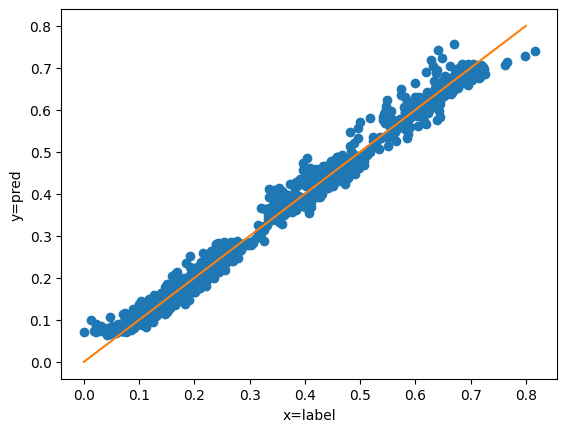

In [ ]:
pred = torch.flatten(model(torch.from_numpy(x_train).type(torch.Tensor))).detach().numpy()
plt.scatter(y_train.reshape(-1,),pred)
plt.plot(np.linspace(0,0.8,20),np.linspace(0,0.8,20),color='C1')
plt.xlabel("x=label")
plt.ylabel("y=pred")
plt.show()


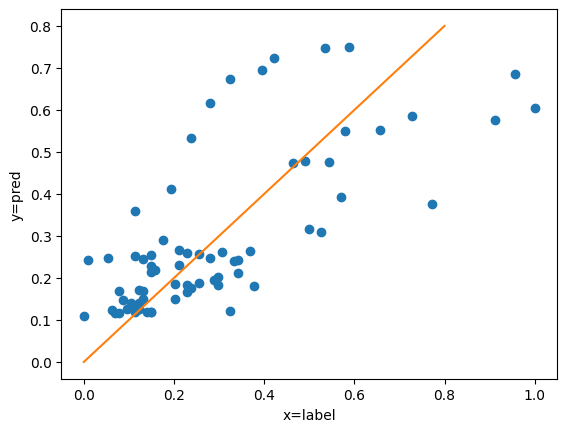

In [ ]:
# data process
# model has been trained

pred = torch.flatten(model(torch.from_numpy(x_val).type(torch.Tensor))).detach().numpy()
plt.scatter(y_val.reshape(-1,),pred)
plt.plot(np.linspace(0,0.8,20),np.linspace(0,0.8,20),color='C1')
plt.xlabel("x=label")
plt.ylabel("y=pred")
plt.show()


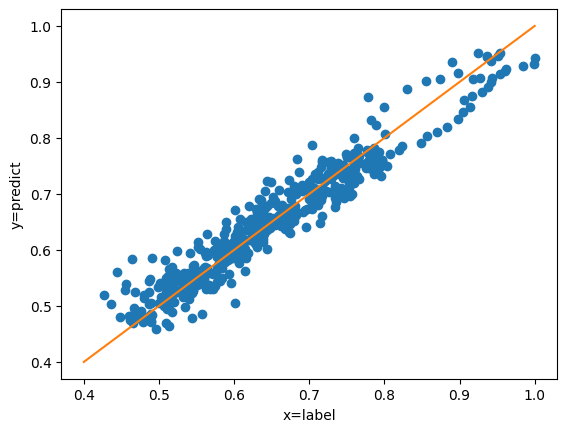

In [ ]:
pred = torch.flatten(model(torch.from_numpy(x_test).type(torch.Tensor))).detach().numpy()
plt.scatter(y_test.reshape(-1,),pred)
plt.plot(np.linspace(0.4,1,20),np.linspace(0.4,1,20),color='C1')
plt.xlabel("x=label")
plt.ylabel("y=predict")
plt.show()
# 数据归一化处理后的展示

In [ ]:
from sklearn.metrics import mean_squared_error

print(scaler.inverse_transform(y_val[0:10].reshape(-1,1)))
print(scaler.inverse_transform(pred[0:10].reshape(-1,1)))
mse = mean_squared_error(scaler.inverse_transform(y_val.reshape(-1,1)), scaler.inverse_transform(pred.reshape(-1,1)))
print("Mean Squared Error:", mse)

[[45.        ]
 [45.40000153]
 [44.75      ]
 [44.59999847]
 [45.25      ]
 [44.04999924]
 [44.5       ]
 [43.59999847]
 [43.34999847]
 [43.75      ]]
[[44.453526]
 [44.8111  ]
 [44.7609  ]
 [44.778427]
 [44.68461 ]
 [44.69282 ]
 [44.82321 ]
 [44.708572]
 [44.677998]
 [44.257515]]
Mean Squared Error: 0.7858000983775946


In [ ]:
print(scaler.inverse_transform(y_test[0:10].reshape(-1,1)))
print(scaler.inverse_transform(pred[0:10].reshape(-1,1)))
# 还原归一化，展示前十个

[[44.34999847]
 [44.59999847]
 [44.84999847]
 [44.5       ]
 [44.29999924]
 [44.54999924]
 [44.04999924]
 [43.59999847]
 [43.29999924]
 [42.20000076]]
[[44.17214 ]
 [44.215908]
 [44.255997]
 [44.38562 ]
 [44.39896 ]
 [44.324863]
 [44.446182]
 [44.453228]
 [44.34204 ]
 [44.19617 ]]
